# Group 10 project: Stroke Prediction

### Import necessary python libraries for the project

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Stage I: Dataset Introduction
---

# I.1. **Dataset Exploration**

## I.1.1 A quick overview of the dataset

In [48]:

## Show the first 10 rows of the dataset
df = pd.read_csv("Data/healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


#### Since the first collumn represent the id of the patient, which is used to identify the patient in this dataset, we can safely assume that this collumn will be redundant for this study and therefore can be safely removed

In [49]:
df=df.drop('id', axis=1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### Data Notes:
* Categorical: `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `residence_type`, `smoking status`, `stroke`
* Numerical: (continuous) `age`, `avg_glucose_level`, `bmi`
* Missing value: `bmi`
* Data types: String, Int, Float

## I.1.2 Check the dataset for potential missing values

In [51]:
# Check out for feature with null value
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## I.1.3 Categorical features

#### Convert datatype for categorical data to `category`

In [52]:
cfeatures = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke"]
for feature in cfeatures:
    df[feature] = df[feature].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(8), float64(3)
memory usage: 161.0 KB


#### Distribution of Categorical features:

In [53]:
df.describe(include =['category'])

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


## I.1.4 Numerical features:

In [54]:
nfeatures = ["bmi", "age", "avg_glucose_level"]


#### Distribution of Numerical features:

In [55]:
df.describe().round(2)

,age,avg_glucose_level,bmi
count,5110.00,5110.00,4909.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.85
min,0.08,55.12,10.30
25%,25.00,77.24,23.50
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60


# I.2. Feature exploration

## I.2.1 Check for potential duplicate data

In [56]:
df.duplicated().sum()

np.int64(0)

#### The dataset has no duplication

## I.2.2 Handling missing data

#### Handling feature with missing value, in our case, the only feature with missing data is the `BMI`. In this project, we will be using K-Nearest Neighbor technique to replace the missing values by imputation.

In [57]:
from sklearn.impute import KNNImputer

In [ ]:
features = ['age', 'gender', 'avg_glucose_level', 'bmi']
df_copy = df[features].copy()
df_copy['gender'] = df_copy['gender'].map({'Male':0, 'Female':1, 'Other':-1}).astype(np.int8)

imputer = KNNImputer(n_neighbors=8)
df_imputed = imputer.fit_transform(df_copy)

df_imputed = pd.DataFrame(df_imputed, columns=df_copy.columns, index=df_copy.index)
df['bmi'] = df_imputed['bmi']

#### This technique will find 8 patients with the closest `age`, `gender`, and `avg_glucose_level` and compute the mean of these 8 patients' `bmi` and then assign to the missing value. 

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(8), float64(3)
memory usage: 161.0 KB


## I.2.3 Handling possible outliers for the Numerical feature: `age`, `avg_glucose_level`, and `bmi`:

### I.2.3.1 age


In [ ]:
#Handle age , check z-score and outliers
df['age'].describe()


count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [ ]:
#check young age who got stroke
under_10_age = df[(df['age'] < 10) & (df['stroke'] == 1)]
under_10_age

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,18.475,Unknown,1


In [ ]:
#Let check someone get married under age
married_under_age = df[(df['age'] < 18) & (df['ever_married'] == 'Yes')]
married_under_age

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
#Z-score
age = df['age']
age_zscore = (age - age.mean()) / age.std()

print(age_zscore.head())

0    1.051331
1    0.785993
2    1.626231
3    0.255317
4    1.582008
Name: age, dtype: float64


In [ ]:
#Find outlier of Age
age_outliers = df[age_zscore.abs() > 3]

print("Number of Age outliers:", len(age_outliers))
print(age_outliers[['age']])

Number of Age outliers: 0
Empty DataFrame
Columns: [age]
Index: []


### Age feature:
+ Total entries: 5110
+ Mean age: about 43.2 years
+ Standard deviation: about 22.6 years
+ Youngest one: 0.08 years
+ Oldest one: 82 years
+ Quartiles:
  - 25% of individuals are younger than 25
  - 50%  are younger than 45
  - 75%  are younger than 61
+ Stroke case under age 10: 1
+ No outliers detected  

### I.2.3.2 avg_glucose_level

In [ ]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [ ]:
glucose = df['avg_glucose_level']

glucose_zscore = (glucose - glucose.mean()) / glucose.std()

glucose_outliers = df[glucose_zscore.abs() > 3]

print("Number of avg_glucose_level outliers:", len(glucose_outliers))

Number of avg_glucose_level outliers: 49


### I.2.3.3 bmi

In [ ]:
df['bmi'].describe()

count    5110.000000
mean       28.943603
std         7.758227
min        10.300000
25%        23.700000
50%        28.200000
75%        33.000000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
bmi = df['bmi']

bmi_zscore = (bmi - bmi.mean()) / bmi.std()

bmi_outliers = df[bmi_zscore.abs() > 3]

print("Number of BMI outliers:", len(bmi_outliers))

Number of BMI outliers: 59


##### From the distribution, the `bmi` feature appears to be normal with a slightly right skewness, the number of outliers for bmi is 59/5110 or 1.15% which is relatively small. Since we are dealing with a medical related problem and the `bmi` score for extreme cases are still relevant in real life, we will keep these outliers in this study.

## I.2.4 Handling missing values for smoking_status category

In [ ]:
print("Values in 'smoking_status':")
print(df['smoking_status'].value_counts(dropna=False))

Values in 'smoking_status':
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


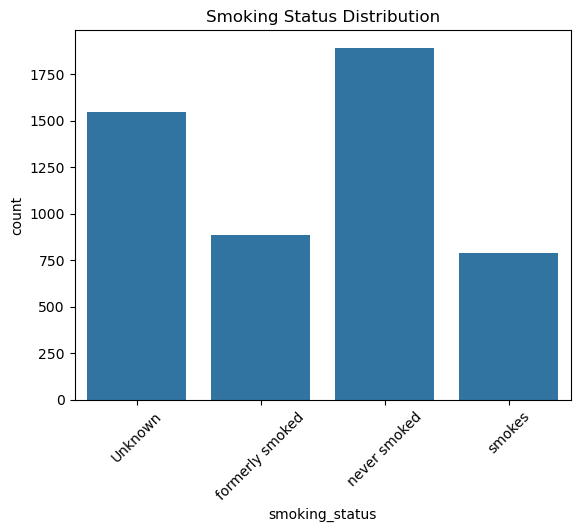

In [ ]:
sns.countplot(data=df, x= 'smoking_status')
plt.title('Smoking Status Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check how unknown group relates to other columns
unknowns = df[df['smoking_status'] == 'Unknown']
print("Summary of 'Unknown' smoking status group")
print(unknowns.describe(include='all'))

Summary of 'Unknown' smoking status group
        gender          age  hypertension  heart_disease ever_married  \
count     1544  1544.000000        1544.0         1544.0         1544   
unique       2          NaN           2.0            2.0            2   
top     Female          NaN           0.0            0.0           No   
freq       836          NaN        1492.0         1496.0          901   
mean       NaN    30.229922           NaN            NaN          NaN   
std        NaN    25.055556           NaN            NaN          NaN   
min        NaN     0.080000           NaN            NaN          NaN   
25%        NaN     8.000000           NaN            NaN          NaN   
50%        NaN    23.000000           NaN            NaN          NaN   
75%        NaN    51.000000           NaN            NaN          NaN   
max        NaN    82.000000           NaN            NaN          NaN   

       work_type Residence_type  avg_glucose_level          bmi  \
count       15

##### With this information, we can decide how to clean the data. The 'unknown' group skews to those younger and that they are often considered healthy in the hypertension and heart disease category. This means that the 'unknown' isn't just missing data but was used for those who were not applicable or were not asked. If we were to clean the data, we would not drop 'unknown' but instead rename it as 'not_applicable/asked' so it can reflect its actual use and retain the people in that group.

In [ ]:
# Treat "Unknown" as a category and fill any missing values
df['smoking_status'] = df['smoking_status'].fillna('Unknown')

In [ ]:
# Standardize the 'smoking_status' categories
df['smoking_status'] = df['smoking_status'].str.lower().str.replace(' ', '_')

# Rename 'unknown' to 'not_applicable/asked'
df['smoking_status'] = df['smoking_status'].replace('unknown', 'not_applicable/asked')

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600,formerly_smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.650,never_smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500,never_smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000,never_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,27.175,never_smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000,never_smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600,never_smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600,formerly_smoked,0


## I.3. Saving the clean data

In [ ]:
df.to_csv("Data/newdata.csv", index=False)

### Check the new data

In [ ]:
df = pd.read_csv("Data/newdata.csv")

In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6000,formerly_smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.6500,never_smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5000,never_smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0000,never_smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0000,formerly_smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4000,never_smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8000,never_smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,27.5375,not_applicable/asked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2000,not_applicable/asked,1


# **Stage II: Statistical Analysis**
---

## II.1 Descriptive Statistics

In [ ]:
df = pd.read_csv("Data/newdata.csv")
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6000,formerly_smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.6500,never_smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5000,never_smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0000,never_smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0000,formerly_smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4000,never_smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8000,never_smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,27.5375,not_applicable/asked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2000,not_applicable/asked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### The dataset consists of  3 numerical features (bmi, age ,avg_glucose_level) and 7 categorical features(gender, hypertension, heart_disease, ever_married, work_type, residence_type, smoking status) with the last feature called stroke be use as label. 

### II.1.a Calculate the mean, median, variance, skewness and kurtosis for the numerical features:

In [ ]:
nfeatures = ["bmi", "age", "avg_glucose_level"]

In [ ]:
stats = pd.DataFrame({
    "mean": df[nfeatures].mean(),
    "median": df[nfeatures].median(),
    "variance": df[nfeatures].var(),
    "skewness": df[nfeatures].skew(),
    "kurtosis": df[nfeatures].kurt()
})

stats = stats.round(2)
print(stats)

                     mean  median  variance  skewness  kurtosis
bmi                 28.94   28.20     60.19      1.04      3.42
age                 43.23   45.00    511.33     -0.14     -0.99
avg_glucose_level  106.15   91.88   2050.60      1.57      1.68


### II.1.b Identify datatype

We examine three selected features: **`avg_glucose_level`**, **`bmi`**, and **`age`**.  
All of them are continuous numerical features, because:

#### 1. `avg_glucose_level`
- **Type:** Float64  
- **Range:** 55.12 - 271.74  
- **Description:** Represents a patient's average blood glucose level.  
- This feature has value that vary over a range between 55.12 - 271.74, so it is a **continuous numerical feature**.

#### 2. `bmi`
- **Type:** Float64  
- **Range:** 10.3 - 97.6  
- **Description:** Body Mass Index (BMI), calculated from height and weight.  
- BMI values can include fractions (e.g., 23.7), so this is a **continuous numerical feature**.

#### 3. `age`
- **Type:** Float64  
- **Range:** 0.08 - 82  
- **Description:** Represents patient age. In this dataset, decimals are present .  
- Age is therefore treated as a **continuous numerical feature**.

## II.2  Distribution Fitting

### a) We select BMI (Body Mass Index)
* Type: Continuous numerical
* Range: 10.3 - 97.6
* Description: BMI is calculated from a person's height and weight and is used to assess body fat and health risk
#### We choose Gamma Distribution because:
* Gamma is defined only for positive real numbers and BMI can not be negative.
* Gamma is a good fit for right skewed model.


### b) Plot Histogram

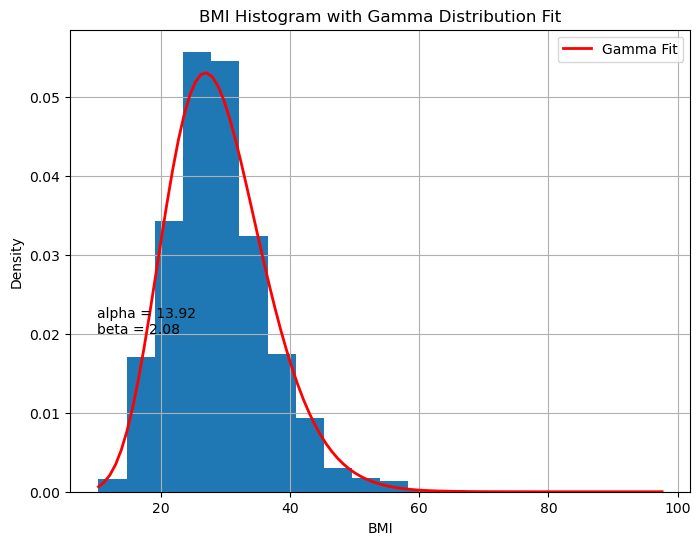

In [ ]:
from scipy.stats.distributions import gamma
#extract bmi data
data = df['bmi']
#Get mean and variance
bmi_mean = data.mean()
bmi_var = data.var()
#calculate alpha and beta 
alpha_mom = bmi_mean ** 2 / bmi_var
beta_mom = bmi_var / bmi_mean
#Plot histogram
data.hist(density=True, bins=20, ec='black', figsize=(8,6))
#Overlay Gamma PDF
label = f'alpha = {alpha_mom:.2f}\nbeta = {beta_mom:.2f}'
plt.annotate(label, xy=(10, 0.02))

x = np.linspace(data.min(), data.max(), 100)
pdf = gamma.pdf(x, a=alpha_mom, scale=beta_mom)

plt.plot(x, pdf, 'r',linewidth=2, label='Gamma Fit')

plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Histogram with Gamma Distribution Fit')
plt.legend()
plt.show()


In [ ]:
print(f"Population Mean: {bmi_mean:.4f}")
print(f"Population Variance: {bmi_var:.4f}")

Population Mean: 28.9436
Population Variance: 60.1901


### Discussion: 
* The histogram shows a clear right skew, with most BMI values clustered between 19 and 38. The Gamma curve mirrors this skew well.
* The Gamma distribution is well-suited for **positive, continuous, and skewed variables**, which matches the nature of BMI.  
* The central portion of the distribution aligns closely with the fitted curve, suggesting a good model fit for most observations.

## II.3 Point Estimate

### II.3.a Random Sampling:

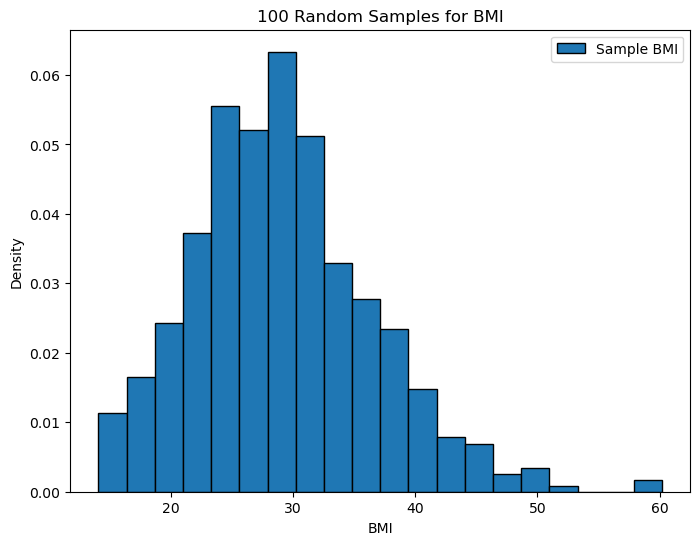

In [ ]:
np.random.seed(42)
sample_bmi = pd.Series(np.random.choice(a=df['bmi'], size=500))

plt.figure(figsize=(8,6))
plt.hist(sample_bmi, bins=20, density=True, edgecolor='black', label='Sample BMI')

plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('100 Random Samples for BMI')
plt.legend()
plt.show()

#### Compare the sample mean and variance with the population mean and variance

In [ ]:
#Sample mean and variance
sample_mean = sample_bmi.mean()
sample_var = sample_bmi.var()

#Pop mean and variance
pop_mean = df['bmi'].mean()
pop_var = df['bmi'].var()

print(f"Mean difference: {abs(sample_mean - pop_mean):.3f}")
print(f"Variance difference: {abs(sample_var - pop_var):.3f}")

Mean difference: 0.335
Variance difference: 6.227


Our sample mean is very close to the population mean with a difference of 0.335. The sample variance show slimghtly bigger in difference when 
comparing to the population variance, which is likely due to random sampling with a small subset of data.

### II.3.b Discussion:

In [91]:
for i in range(3):
    np.random.seed(i+1)
    sample_bmi = pd.Series(np.random.choice(a=df['bmi'], size=100))

    mean = sample_bmi.mean()
    var = sample_bmi.var()

    #Hist for each sample
    plt.figure(figsize=(8, 6))
    plt.hist(sample_bmi, bins=20, density=True, edgecolor='black', 
             label=f'Sample {i+1} (mean={mean:.2f}, var={var:.2f})')

    plt.xlabel('BMI')
    plt.ylabel('Density')
    plt.title(f'Random Sample {i+1} of BMI')
    plt.legend()
    plt.show()
    print(f"Sample {i+1} mean: {mean:.2f}")
    print(f"Sample {i+1} variance: {var:.2f}")

KeyError: 'bmi'

In [ ]:
sample_stats = {
    "Sample Run": ["Sample 1", "Sample 2", "Sample 3", "Population"],
    "Mean": [31.12, 28.15, 29.61, df["bmi"].mean()],
    "Variance": [90.82, 53.40, 72.78, df["bmi"].var()]
}

sample_df = pd.DataFrame(sample_stats).round(2)
sample_df

,Sample Run,Mean,Variance
0,Sample 1,31.12,90.82
1,Sample 2,28.15,53.40
2,Sample 3,29.61,72.78
3,Population,28.94,60.19



- The three random samples yield slightly different **means** and **variances**, even though they are drawn from the same population.  
- This variation arises because  each sample may capture different subsets of the population distribution.  
- Despite these differences, all values remain **close to the population’s true mean and variance**, illustrating that random samples approximate population parameters decently.  
- The difference between the **means** and **variances** can be improved by increasing the sample size. This would result in a smaller differences between the sample means/variances and the population mean/variance

## II.4 Correlation Analysis

Correlation Matrix:
                     bmi    age  avg_glucose_level
bmi                1.000  0.334              0.184
age                0.334  1.000              0.238
avg_glucose_level  0.184  0.238              1.000


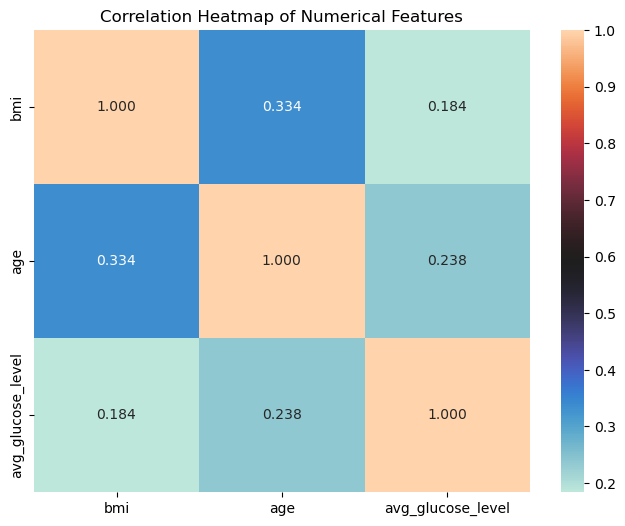

In [ ]:
corr_matrix = df[nfeatures].corr().round(3)

#Correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

#Plot the heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="icefire", fmt=".3f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


###  Discussion

- **bmi and age (r = 0.334)**  
  There is a moderate positive correlation, meaning that BMI tends to increase slightly with age.  
  However, this relationship is not very strong.

- **bmi and avg_glucose_level (r = 0.184)**  
  There is a weak positive correlation indicates that higher BMI is slightly associated with higher glucose levels.
 
- **age and avg_glucose_level (r = 0.238)**  
  A weak-to-moderate correlation shows that older individuals tend to have higher glucose levels on average,  
  likely due to metabolic and health factors.

### **Conclusion**

Since all of the numerical show weak to moderate positive relationship with one another, we can see that they are slightly related in a biological way but remain resonably independent. Which means that we can treat them as independent feature for our model and prediction.

## II.5 Hypotheses Question Propose

Based on the numerical features related to stroke prediction, our team propose the following hypotheses:

#### **Hypothesis 1: Average Glucose Level and Stroke Risk**
- **Research Question:** Are higher average glucose levels associated with an increased risk of stroke?  
- **Null Hypothesis (H₀):** There is **no significant** relationship between average glucose level and stroke occurrence.  
- **Alternative Hypothesis (H₁):** Higher average glucose levels can lead to **higher chance** of having a stroke.  
- **Variables:**  
  - Independent Variable: `avg_glucose_level`  
  - Dependent Variable: `stroke`

#### **Hypothesis 2: BMI and Stroke Risk**
- **Research Question:** Is BMI a significant predictor of stroke occurrence?  
- **Null Hypothesis (H₀):** BMI has **no significant** effect on the chance of having a stroke.  
- **Alternative Hypothesis (H₁):** Higher BMI might associate with **higher chance** of stroke.  
- **Variables:**  
  - Independent Variable: `bmi`  
  - Dependent Variable: `stroke`

#### **Hypothesis 3: Age and Stroke Risk**
- **Research Question:** Does older age increase the likelihood of stroke?  
- **Null Hypothesis (H₀):** There is **no significant** relationship between age and stroke occurrence.  
- **Alternative Hypothesis (H₁):** Older individuals have a **higher chance** of experiencing a stroke.  
- **Variables:**  
  - Independent Variable: `age`  
  - Dependent Variable: `stroke`  